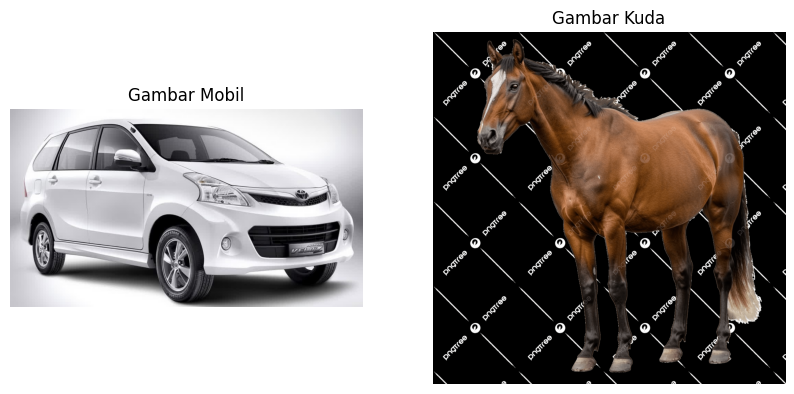

In [14]:
import cv2
import matplotlib.pyplot as plt

# Load images
img1 = cv2.imread("/kaggle/input/kuda-dan-mobill/mobil.jpg")
img2 = cv2.imread("/kaggle/input/kuda-dan-mobill/kuda.png")

# Convert ke grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Tampilkan gambar asli
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("Gambar Mobil")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("Gambar Kuda")
plt.axis("off")
plt.show()


deteksi key point

In [15]:
sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

print("Jumlah keypoint mobil:", len(kp1))
print("Jumlah keypoint kuda:", len(kp2))


Jumlah keypoint mobil: 1247
Jumlah keypoint kuda: 5575


visualisasi keypoint

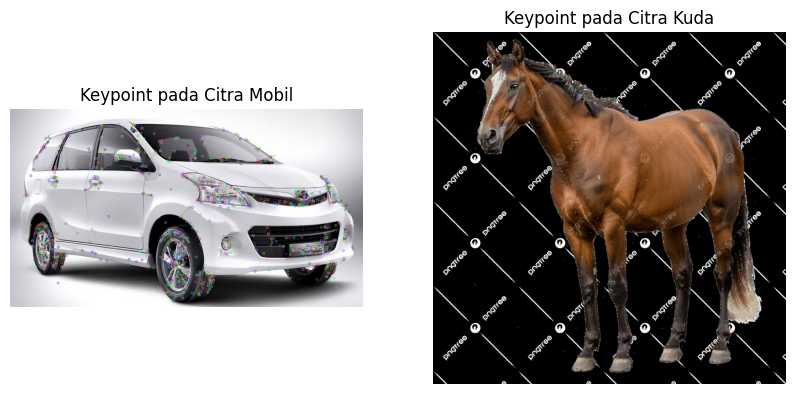

In [16]:
img1_kp = cv2.drawKeypoints(img1, kp1, None)
img2_kp = cv2.drawKeypoints(img2, kp2, None)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img1_kp, cv2.COLOR_BGR2RGB))
plt.title("Keypoint pada Citra Mobil")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img2_kp, cv2.COLOR_BGR2RGB))
plt.title("Keypoint pada Citra Kuda")
plt.axis("off")
plt.show()


fM

In [17]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)

# Urutkan berdasarkan jarak (semakin kecil semakin mirip)
matches = sorted(matches, key=lambda x: x.distance)

print("Jumlah match:", len(matches))


Jumlah match: 410


visualisai hasil

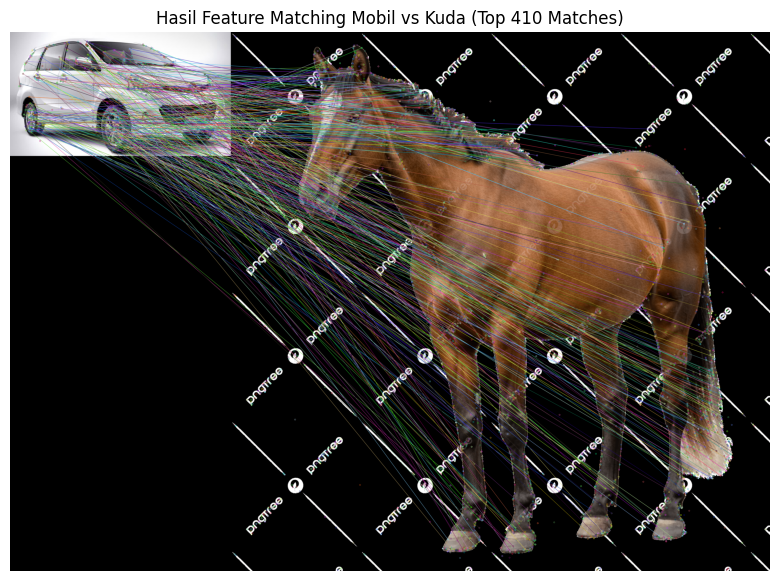

In [18]:
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:410], None)

plt.figure(figsize=(15,7))
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.title("Hasil Feature Matching Mobil vs Kuda (Top 410 Matches)")
plt.axis("off")
plt.show()
